In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
# The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [2]:
# Imported dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
# As we look at the above data frame that the column quality is the target label. It will termed as a Classification problem.

In [9]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [12]:
df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


In [14]:
# Exploratory Data Analysis (EDA)
df.shape

(1599, 12)

In [15]:
#there are total 1599 rows and 12 columns present in our dataset.

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
#Checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
# There is two types of data i.e. int and float.

In [19]:
# Checking the null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df.isnull().sum().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

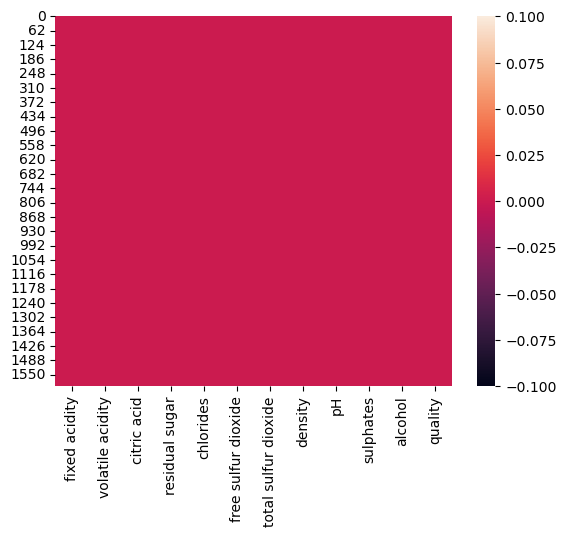

In [23]:
# Visualization using Heatmap

sns.heatmap(df.isnull())

In [25]:
# Checking the value count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")



7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [26]:
# Checking the null values again

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

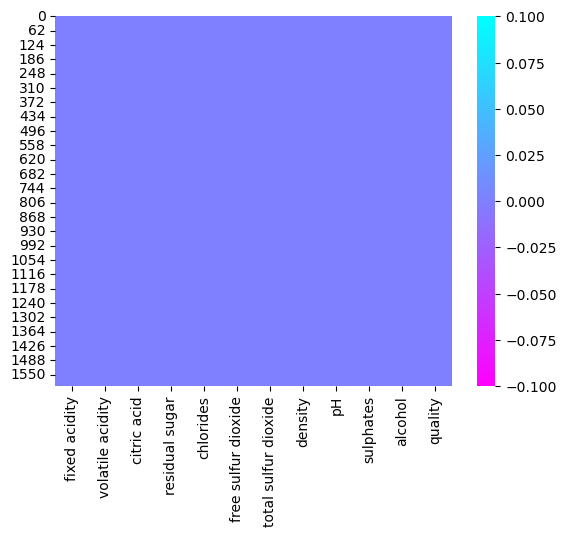

In [27]:
# Visualization using Heatmap

sns.heatmap(df.isnull(),cmap = "cool_r")

In [4]:
df.iloc[475,:]

fixed acidity            9.6000
volatile acidity         0.6800
citric acid              0.2400
residual sugar           2.2000
chlorides                0.0870
free sulfur dioxide      5.0000
total sulfur dioxide    28.0000
density                  0.9988
pH                       3.1400
sulphates                0.6000
alcohol                 10.2000
quality                  5.0000
Name: 475, dtype: float64

In [5]:
# Checking no of unique values in each columns

df.nunique().to_frame("No of Unique values")

,No of Unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [6]:
# There are unique values present in this dataset

In [7]:
# Checking the list of count of target

df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
# There are six types of categories in target column

In [8]:
# Checking unique value of target colunm

df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:

# stastical summery of numrical column.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# This gives ststical information of numerical values
# The counts of all values are same which means that there is no missing values in dataset.
# There is a big gap between 75% and max values of residual sugar column
# There is a big gap between 75% and max values of free sulfur dioxide column
# There is a huge gap between 75% and max value of total sulfur dioxide column
# All these gaps indicate that there are outliers present in our dataset.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


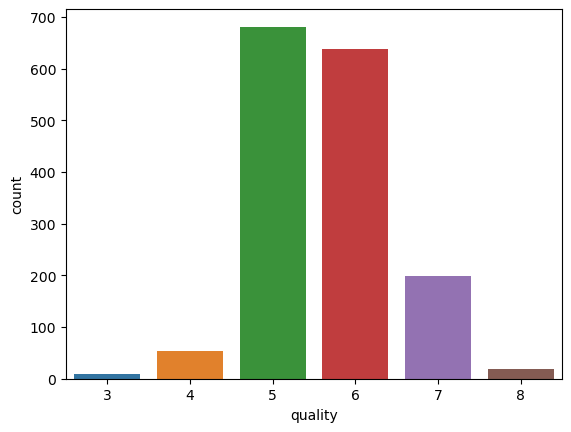

In [11]:
# Data Visualisation

ax = sns.countplot(x ='quality', data = df)
print(df["quality"].value_counts())

In [12]:
# In above grphical representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher  others. It is indicates an imbalance which will need to be rectified in later part.  

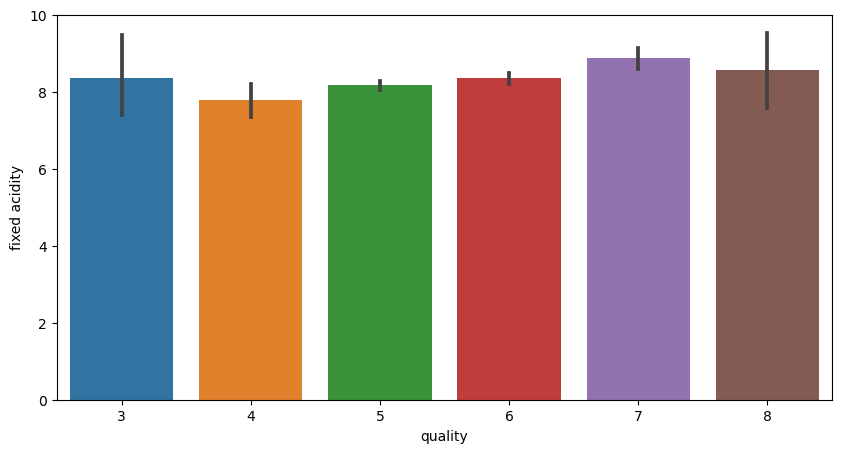

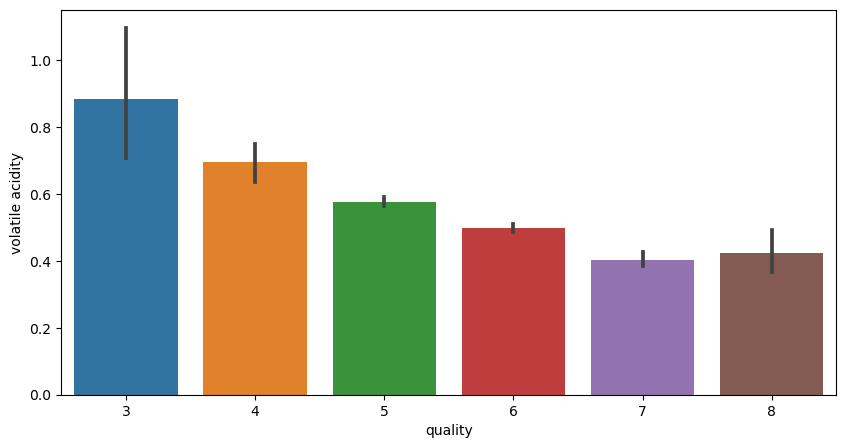

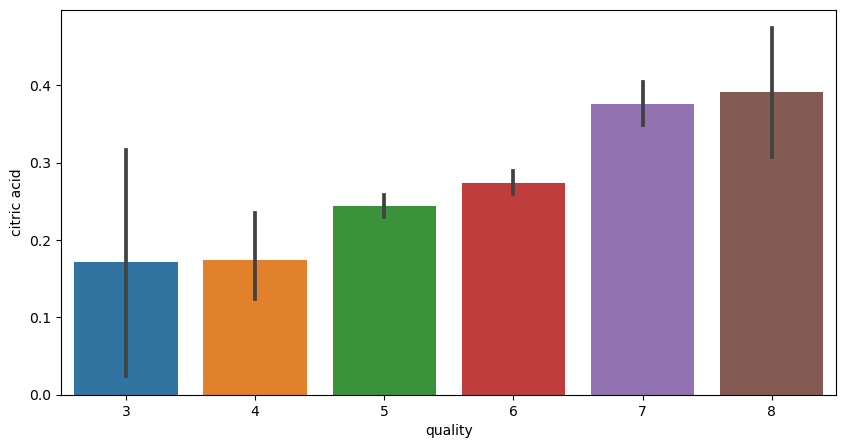

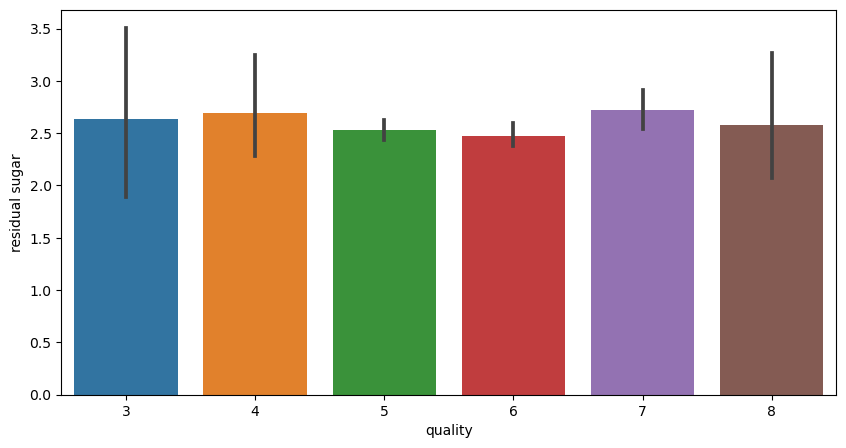

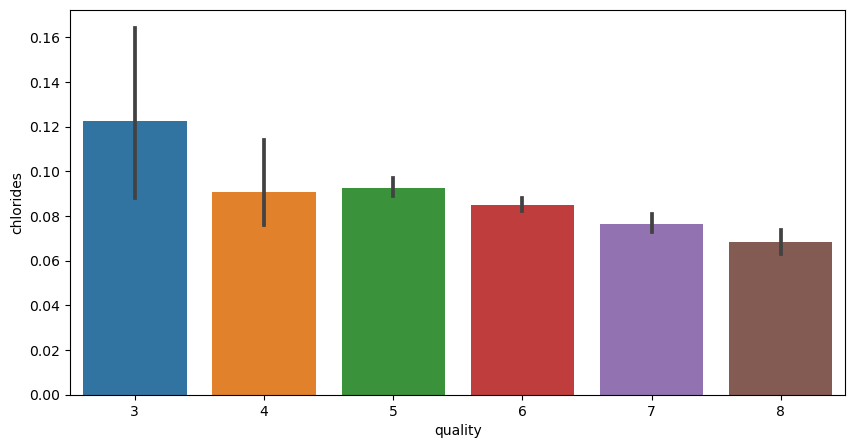

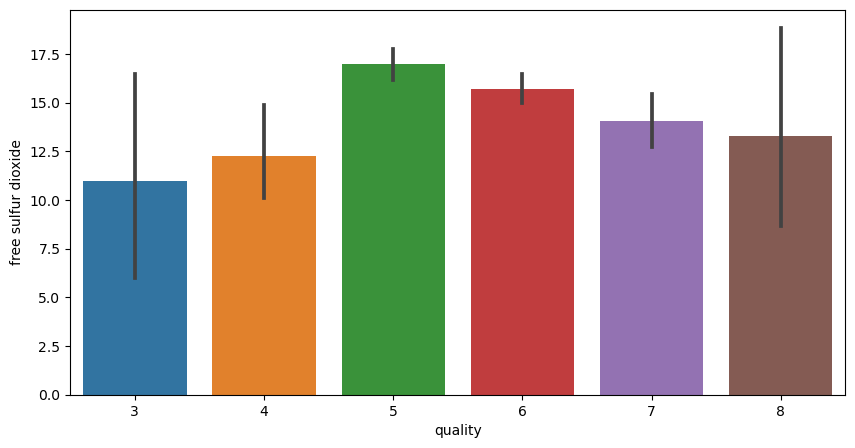

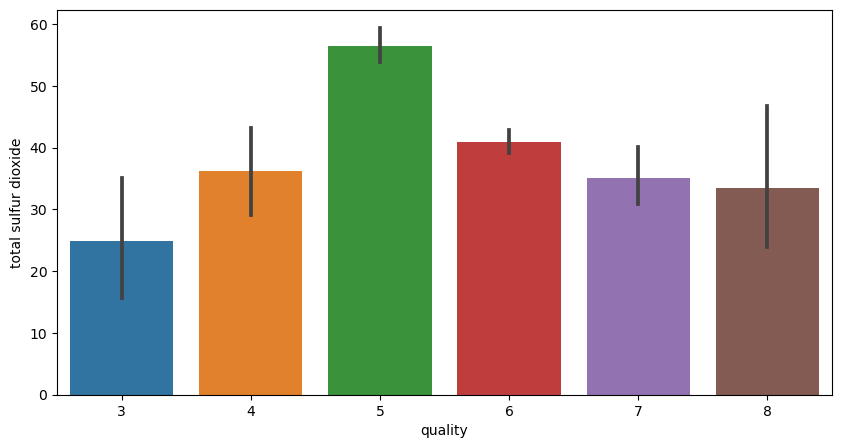

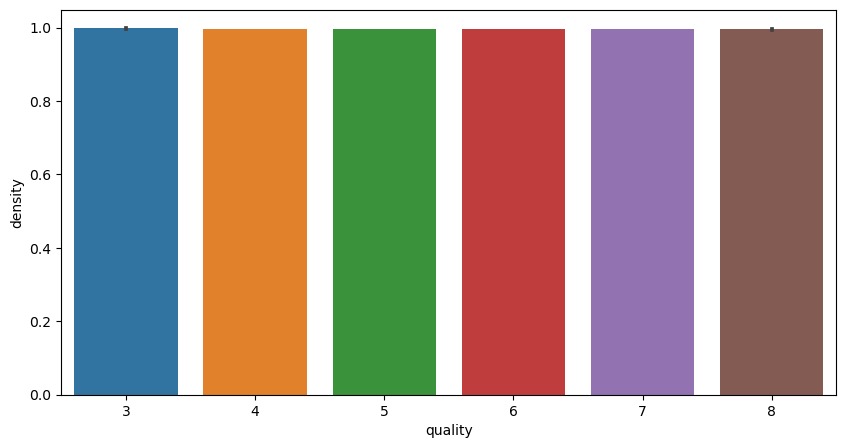

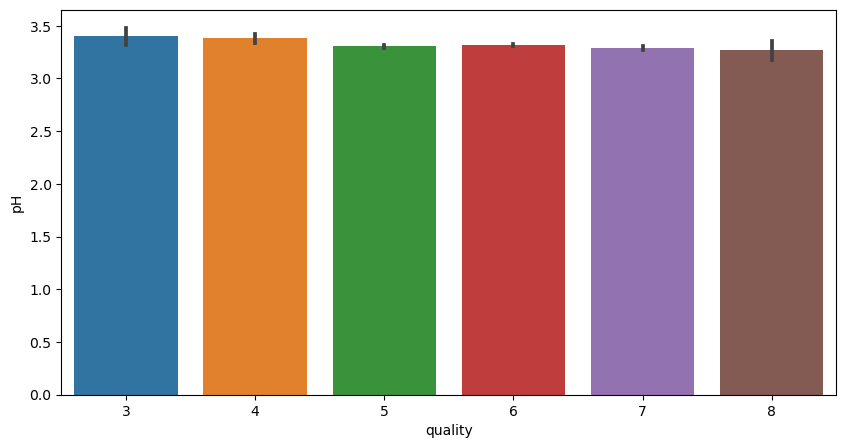

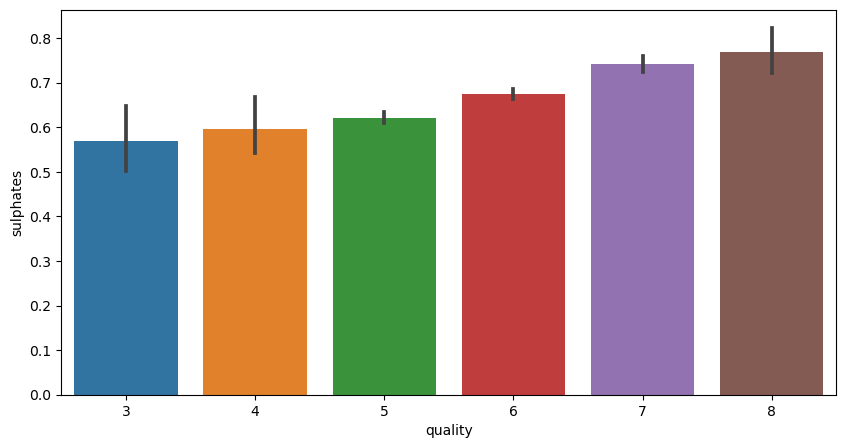

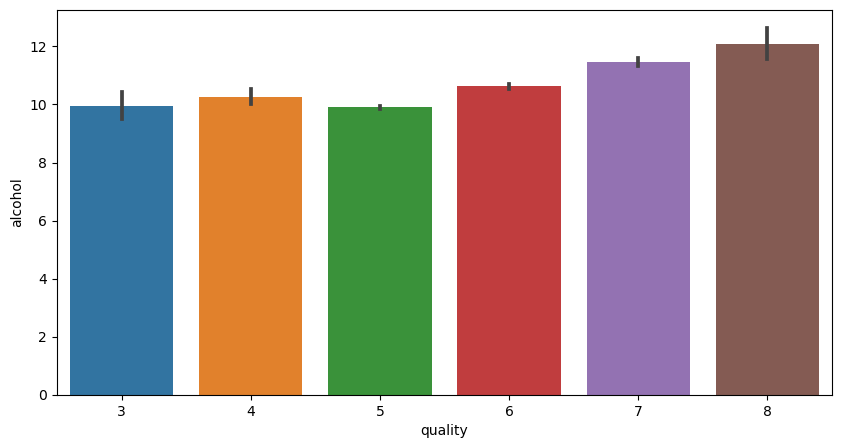

In [20]:
# Visualisation the count of fixed acidity


index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df)

plt.show()

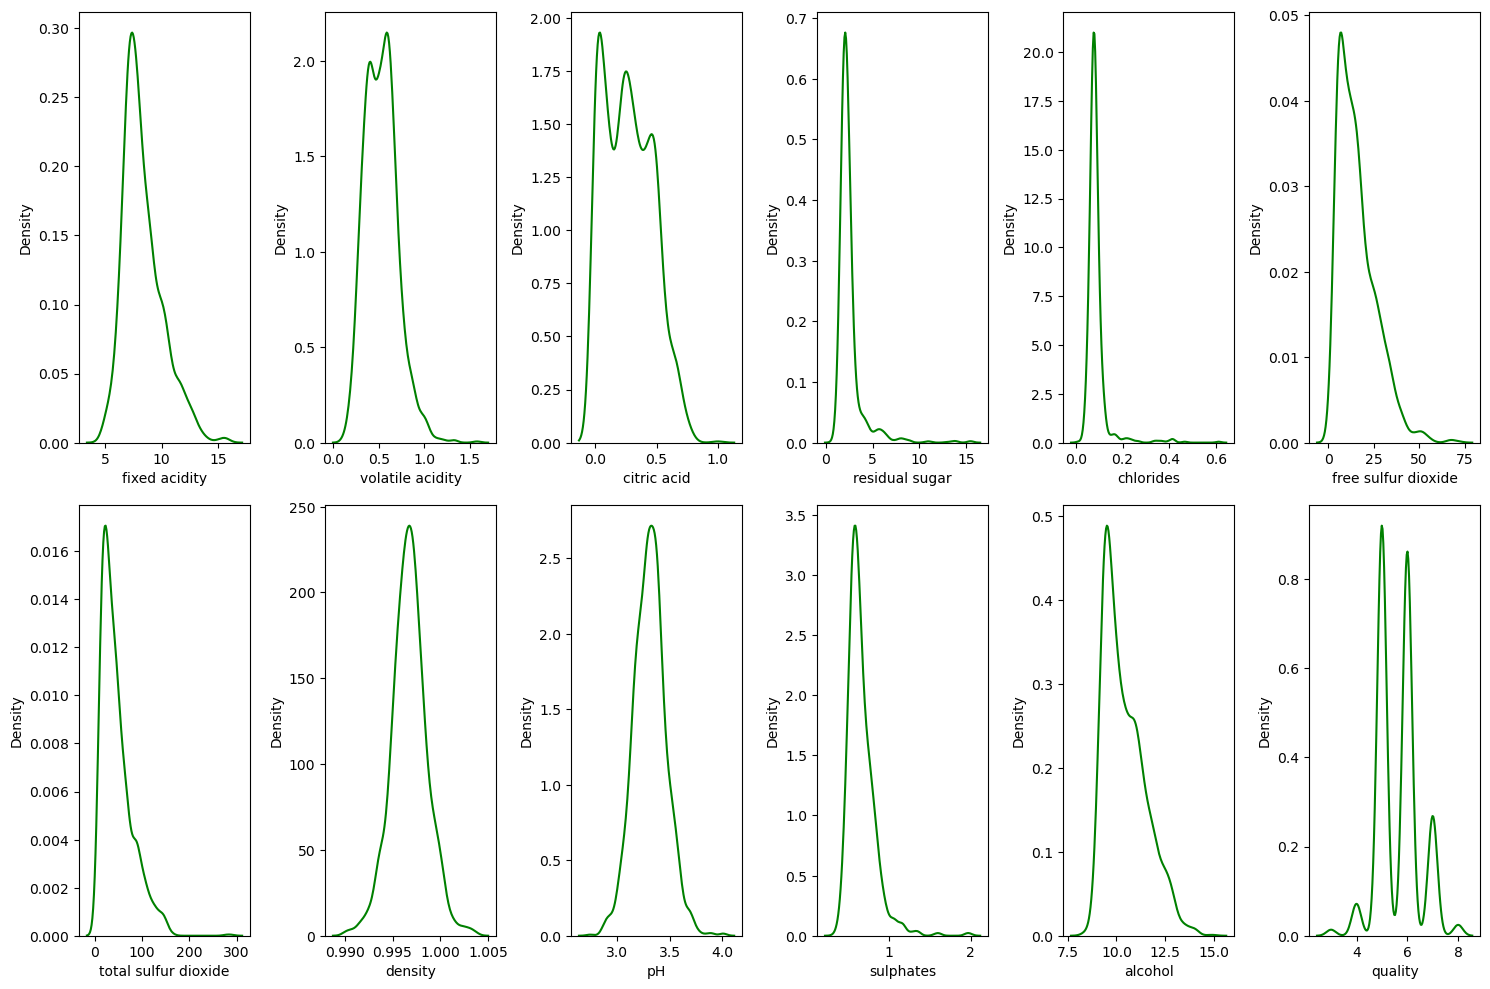

In [13]:
#  Lets check how the data distrubited.

fig,ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g")
    index += 1
plt.tight_layout()
plt.show()

In [14]:
# The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we see some skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns.We will need to fix the imbalance data inside it.

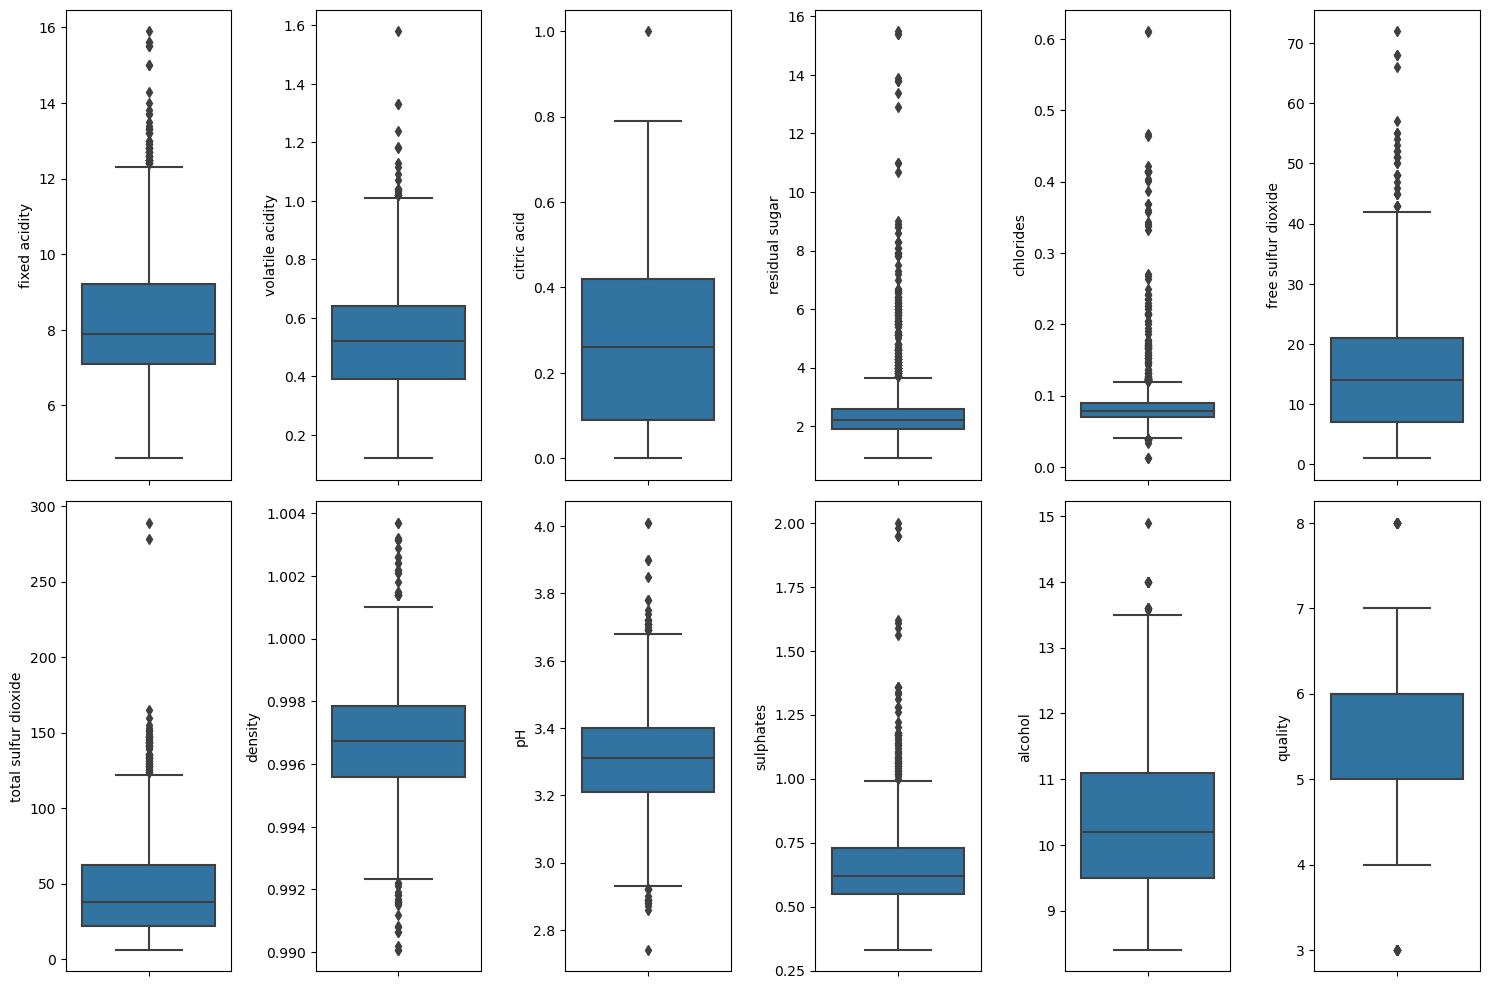

In [15]:
#Checking for the Outliers

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout()
plt.show()

In [16]:
# In above boxplot we are able to see the outliers clearly. We have to proceed for further analysis and to remove outliers. Right now I am just trying to retain as much of data which is possible in the given dataset.

In [17]:
# Checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [18]:
# Here we see the skewness information present in our dataset. We see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
#Correlation between target veriable and independent veriables

cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


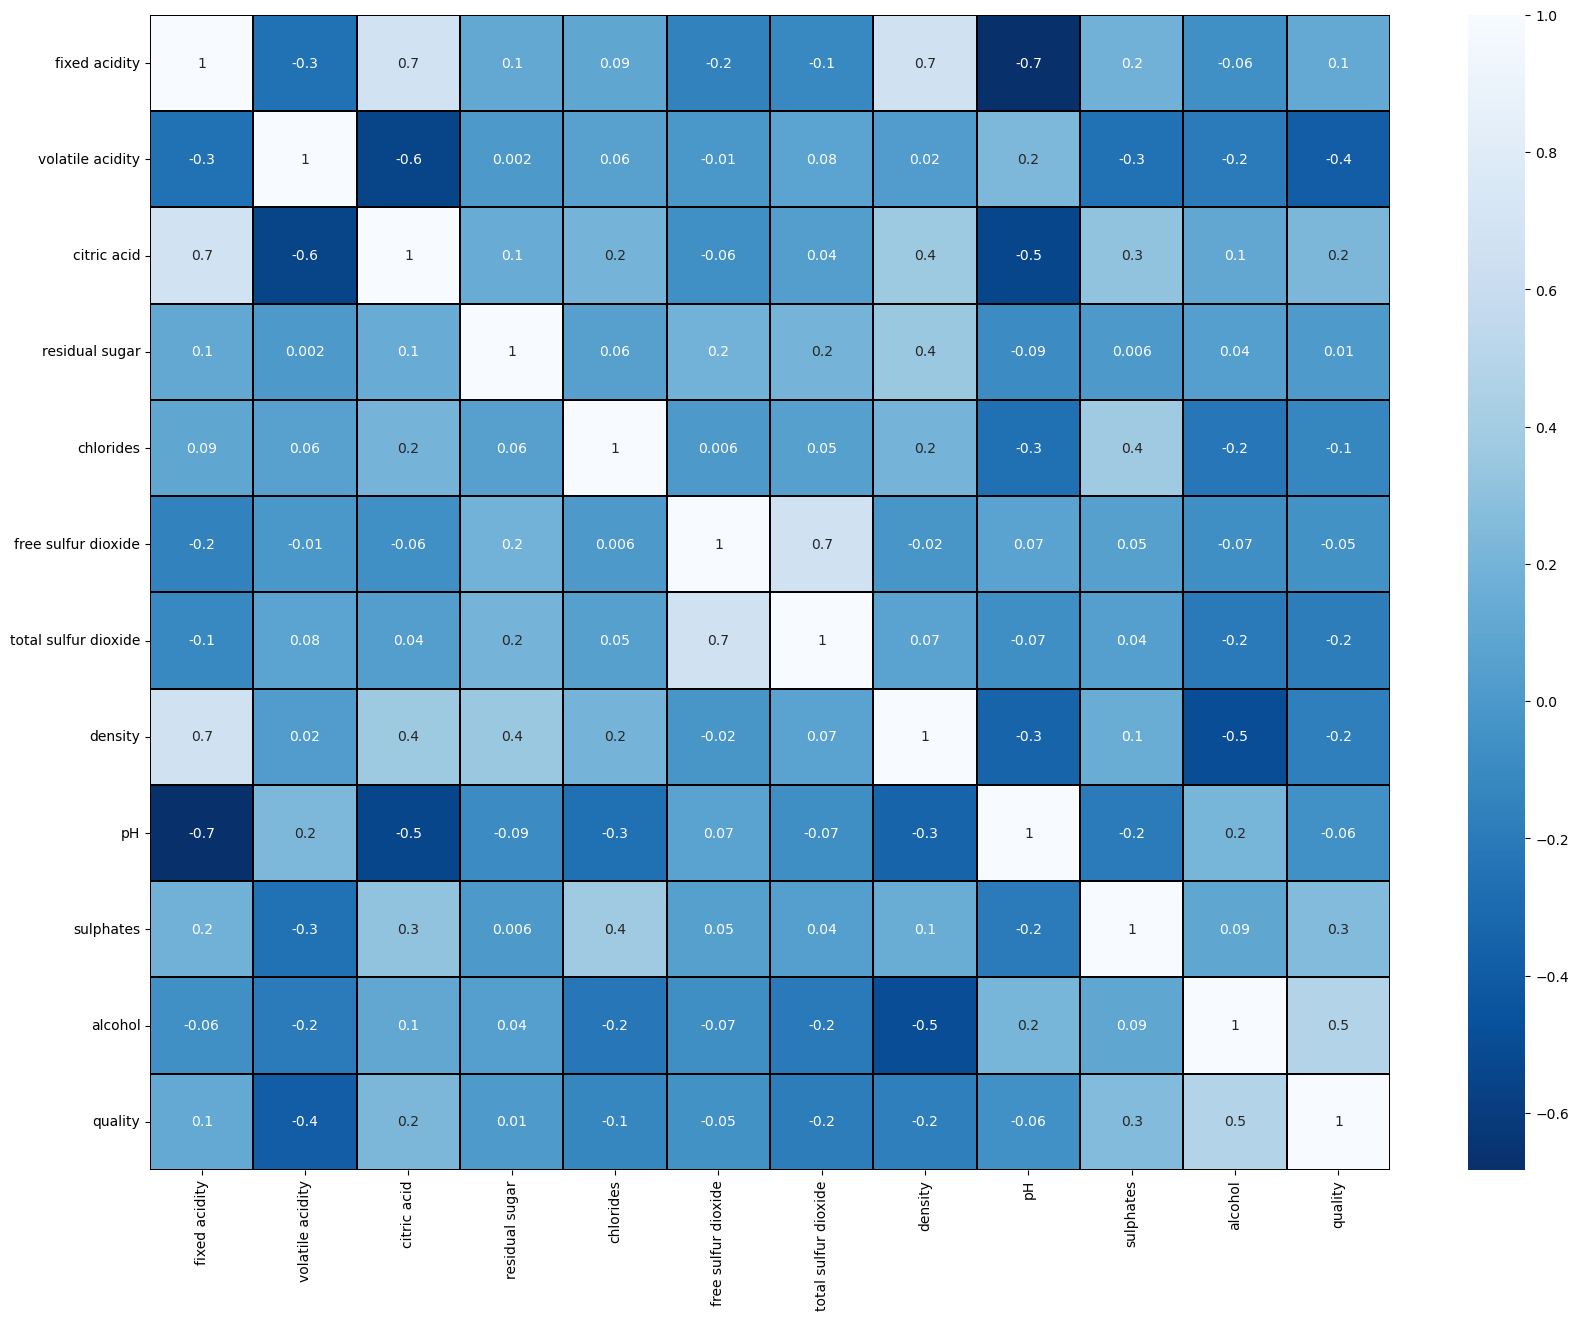

In [23]:
# Visualizing the correlation matrix using plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1,fmt = ".1g", linecolor ="black", annot= True,cmap = "Blues_r")
plt.yticks(rotation= 0);
plt.show()

In [3]:
# 0-No reletion,-0.3 to 0.3 -less reletion, grater than -0.5 or grater than 0.5 -moderate coreletion,grater than -0.7 or grater than 0.7 -high coreletion

In [10]:
cor['quality'].sort_values(ascending = False)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

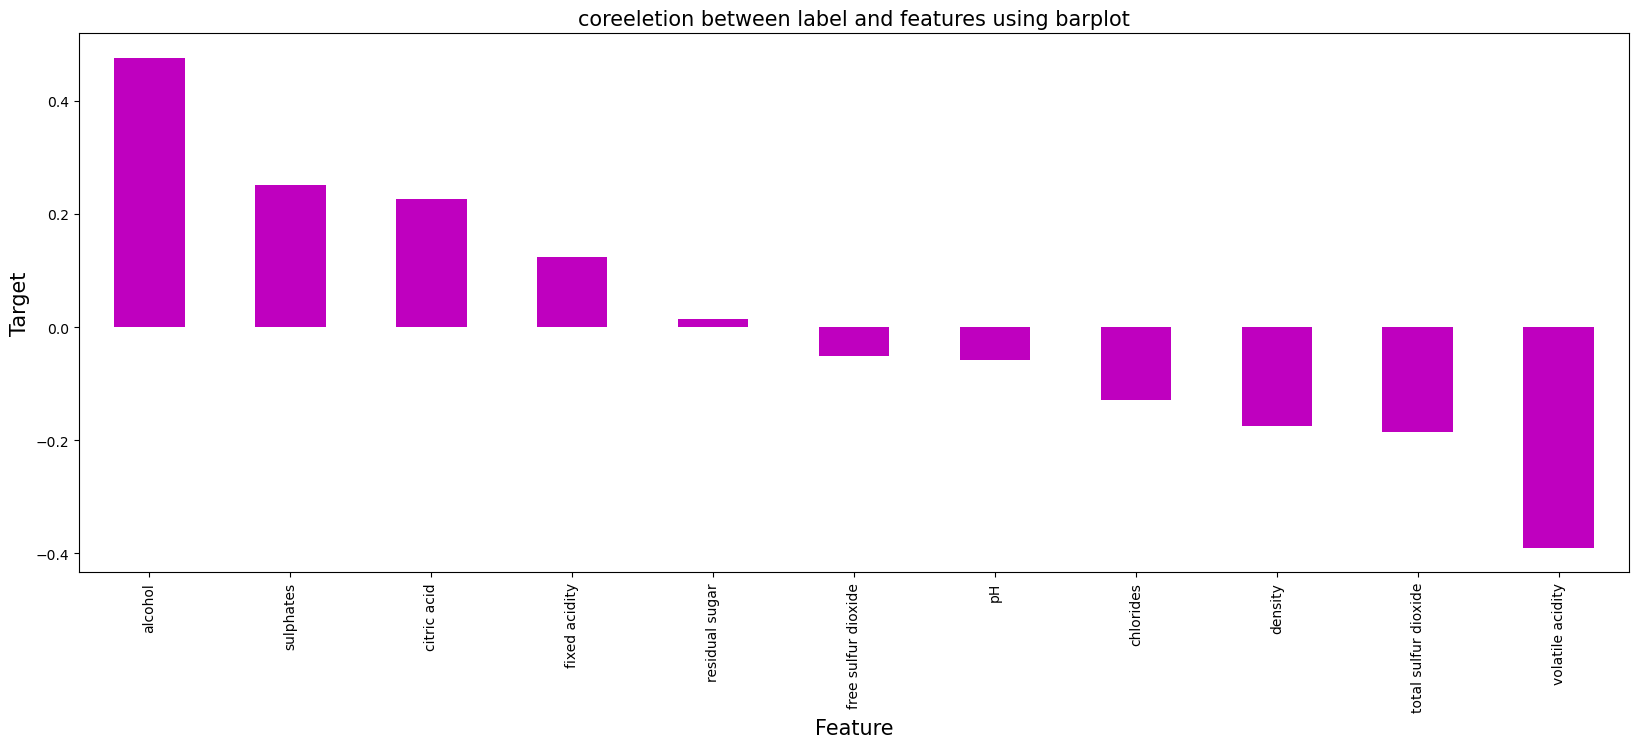

In [15]:
# Visualising coreeletion between label and features using barplot.

plt.figure(figsize =(20,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind= 'bar',color="m")
plt.xlabel('Feature',fontsize= 15)
plt.ylabel('Target',fontsize= 15)
plt.title("coreeletion between label and features using barplot",fontsize=15)
plt.show()

In [16]:
# From the above bar graph we notice positive and negative correletion between features and target. Here feature residual sugar is very less correlation of the column.

In [5]:
# Seprating features and labels

x= df.drop("quality",axis=1)
y =df["quality"]

In [6]:
# Feature Scaling using standard Scalerisation

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x-= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.928360,-0.261877,1.391472,2.353218,0.319707,11.466193,34.379133,0.439526,2.221357,1.139207,10.360246
1,8.098547,-1.087442,1.391472,2.556584,-0.125875,24.127362,66.375637,0.968539,3.919933,0.551050,10.384777
2,8.098547,-0.537065,1.226070,2.469427,-0.004353,15.083669,53.770953,0.862736,3.591177,0.698089,10.384777
3,9.545144,1.664443,-0.924154,2.353218,0.339960,16.892408,59.588500,0.333723,4.139104,1.041180,10.384777
4,7.928360,-0.261877,1.391472,2.353218,0.319707,11.466193,34.379133,0.439526,2.221357,1.139207,10.360246
...,...,...,...,...,...,...,...,...,...,...,...
1594,7.417796,0.196771,1.060669,2.382271,0.036155,30.457946,44.075043,1.973665,2.550114,1.041180,10.427706
1595,7.290155,0.426095,0.977968,2.440375,0.603259,36.788531,50.862180,1.857282,2.166564,0.158945,10.470636
1596,7.460343,0.609554,0.853916,2.469427,0.319707,27.744839,40.196679,1.529294,2.714492,0.207958,10.458370
1597,7.290155,-0.009620,0.895267,2.382271,0.339960,30.457946,44.075043,1.672127,1.892600,0.404010,10.409308


In [12]:
# We have scaled the data using standard scalarisation method to overcome the issues of biasness.


In [7]:
# Checking Variance Inflation Factor(VIF)

# Find variance inflation factor in each scaled column i.e. x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif["Featuers"]= x.columns

vif

,VIF values,Featuers
0,782.154944,fixed acidity
1,2.507203,volatile acidity
2,3.333859,citric acid
3,53.083192,residual sugar
4,1.471324,chlorides
5,7.492588,free sulfur dioxide
6,6.741414,total sulfur dioxide
7,6.458011,density
8,41.858607,pH
9,2.132293,sulphates


In [17]:
# So we have solved the multicolinearity issue, we can now move ahead model building

In [18]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
# Hear we see that the data is not balence, since it is classification problems,we will balance the data using oversampling method.

In [8]:
# Oversampling

!pip install imblearn 
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)


In [22]:
# Checking value count of target column
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
y1.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [24]:
# Now data is balance so we can build machine learing classification model. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        print("Best Accuracy is",maxAccu,"at random state",maxRs)
    
    


Best Accuracy is 0.8605220228384992 at random state 1
Best Accuracy is 0.8686786296900489 at random state 4
Best Accuracy is 0.8752039151712887 at random state 6
Best Accuracy is 0.8833605220228385 at random state 67
Best Accuracy is 0.8866231647634584 at random state 177


In [10]:
#Creating Train test split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [11]:
# RandomForest Classifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8499184339314845
[[215   0   0   0   0   0]
 [  0 164   5   3   0   0]
 [  2  20 152  28   6   0]
 [  3   9  48 114  34   7]
 [  0   0   2  11 190   5]
 [  0   0   0   0   1 207]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       215
           4       0.85      0.95      0.90       172
           5       0.73      0.73      0.73       208
           6       0.73      0.53      0.61       215
           7       0.82      0.91      0.87       208
           8       0.95      1.00      0.97       208

    accuracy                           0.85      1226
   macro avg       0.84      0.85      0.84      1226
weighted avg       0.84      0.85      0.84      1226



In [12]:
# The accuracy for the model is 0.85

In [13]:
#Logistic Regression

LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))


0.4902120717781403
[[159  32  24   0   0   0]
 [ 35  89  37   7   3   1]
 [ 20  55  90  34   6   3]
 [ 20  37  46  61  27  24]
 [  2   8   4  40  71  83]
 [  0   0   0   4  73 131]]
              precision    recall  f1-score   support

           3       0.67      0.74      0.71       215
           4       0.40      0.52      0.45       172
           5       0.45      0.43      0.44       208
           6       0.42      0.28      0.34       215
           7       0.39      0.34      0.37       208
           8       0.54      0.63      0.58       208

    accuracy                           0.49      1226
   macro avg       0.48      0.49      0.48      1226
weighted avg       0.48      0.49      0.48      1226



In [15]:
# Accuracy score for Logistic Regression is 0.49

In [18]:
#Bagging Classifier

BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.8221859706362153
[[215   0   0   0   0   0]
 [  2 159   6   5   0   0]
 [  4  21 144  35   4   0]
 [  3  13  53 107  31   8]
 [  0   1   8  12 180   7]
 [  0   0   0   0   5 203]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       215
           4       0.82      0.92      0.87       172
           5       0.68      0.69      0.69       208
           6       0.67      0.50      0.57       215
           7       0.82      0.87      0.84       208
           8       0.93      0.98      0.95       208

    accuracy                           0.82      1226
   macro avg       0.81      0.83      0.82      1226
weighted avg       0.81      0.82      0.82      1226



In [19]:
# Accuracy score for Bagging Classifier  is 0.82

In [20]:
#Extra Trees Classifier

ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.8646003262642741
[[215   0   0   0   0   0]
 [  0 167   4   1   0   0]
 [  6  16 153  29   4   0]
 [  0  14  45 126  24   6]
 [  0   0   3   9 192   4]
 [  0   0   0   0   1 207]]
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       215
           4       0.85      0.97      0.91       172
           5       0.75      0.74      0.74       208
           6       0.76      0.59      0.66       215
           7       0.87      0.92      0.90       208
           8       0.95      1.00      0.97       208

    accuracy                           0.86      1226
   macro avg       0.86      0.87      0.86      1226
weighted avg       0.86      0.86      0.86      1226



In [29]:
#Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))


0.8058727569331158
[[215   0   0   0   0   0]
 [  0 156  12   4   0   0]
 [  2  16 142  38  10   0]
 [  5  12  58  99  35   6]
 [  0   1   3  26 171   7]
 [  0   0   0   0   3 205]]
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       215
           4       0.84      0.91      0.87       172
           5       0.66      0.68      0.67       208
           6       0.59      0.46      0.52       215
           7       0.78      0.82      0.80       208
           8       0.94      0.99      0.96       208

    accuracy                           0.81      1226
   macro avg       0.80      0.81      0.80      1226
weighted avg       0.80      0.81      0.80      1226



In [32]:
#Support Vector Machine Classifier

SVC = SVC()
SVC.fit(x_train,y_train)
predSVC = SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,pred))


0.3866231647634584
[[136   6   0  73   0   0]
 [ 55  12  38  60   6   1]
 [ 23  13  81  78   4   9]
 [ 31   5  37  99  17  26]
 [ 29   4  13  68  23  71]
 [ 10   0   5  47  23 123]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       215
           4       0.87      0.95      0.91       172
           5       0.71      0.72      0.72       208
           6       0.72      0.53      0.61       215
           7       0.82      0.90      0.86       208
           8       0.95      1.00      0.97       208

    accuracy                           0.85      1226
   macro avg       0.84      0.85      0.84      1226
weighted avg       0.84      0.85      0.84      1226



In [11]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [23]:
#Checking CV score for Random Forest Classifier

score= cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differenc between Accuracy score and cross validation score is  ",accuracy_score(y_test,predRFC) - score.mean())

[0.8007335  0.79681763 0.79314565 0.81395349 0.82007344]
0.8049447408821708
Differenc between Accuracy score and cross validation score is   0.044973693049313646


In [24]:
#Checking CV score for Logistic Regression

score= cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differenc between Accuracy score and cross validation score is  ",accuracy_score(y_test,predLR) - score.mean())

[0.44865526 0.45287638 0.46756426 0.47368421 0.51897185]
0.4723503903900309
Differenc between Accuracy score and cross validation score is   0.017861681388109396


In [31]:
#Checking CV score for Gradient Boosting Classifier

score= cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differenc between Accuracy score and cross validation score is  ",accuracy_score(y_test,predGB) - score.mean())

[0.79217604 0.75764994 0.76621787 0.79926561 0.77968176]
0.7789982433196767
Differenc between Accuracy score and cross validation score is   0.026874513613439066


In [44]:
#Checking CV score for Bagging Classifier

score= cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Differenc between Accuracy score and cross validation score is  ",accuracy_score(y_test,predBC) - score.mean())

[0.5375     0.553125   0.55       0.54375    0.57053292]
0.5509815830721003
Differenc between Accuracy score and cross validation score is   0.271204387564115


In [45]:
#Checking CV score for Extra Trees Classifier

score= cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Differenc between Accuracy score and cross validation score is  ",accuracy_score(y_test,predET) - score.mean())

[0.83618582 0.79436965 0.81884945 0.82619339 0.83231334]
0.8215823290528592
Differenc between Accuracy score and cross validation score is   0.04301799721141486


In [12]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV 

parameter = {'criterion' : ['gini', 'entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators' :[50,100,200,300]}

In [47]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameter, cv=5)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [ ]:
GCV.best_params_

In [15]:
Final_Model = ExtraTreesClassifier(criterion='entropy',max_depth = 10,n_estimators = 100,random_state = 50)
Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
acc = (accuracy_score(y_test, pred))
print("Accuracy score for the Best Model is:", acc*100)

Accuracy score for the Best Model is: 79.69004893964112


In [16]:
Final_Model = ExtraTreesClassifier(criterion='gini',max_depth = 10,n_estimators = 100,random_state = 1000)
Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
acc = (accuracy_score(y_test, pred))
print("Accuracy score for the Best Model is:", acc*100)

Accuracy score for the Best Model is: 79.7716150081566


In [13]:
# Ploting ROC and compare AUC for all model use

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET, x_test, y_test)
plot_roc_curve(RFC,x_test, y_test,ax= disp.ax)
plot_roc_curve(LR,x_test, y_test,ax= disp.ax)
plot_roc_curve(SVC,x_test, y_test,ax= disp.ax)
plot_roc_curve(GB,x_test, y_test,ax= disp.ax)
plot_roc_curve(ABC,x_test, y_test,ax= disp.ax)
plot_roc_curve(BC,x_test, y_test,ax= disp.ax)

plt.legend(prop={'size':11},loc= 'lower right')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\SANDEEP\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [27]:
# Saving the Model

import joblib
joblib.dump(Final_Model,"Red_Wine_Quality_Prediction_Project.pkl")

['Red_Wine_Quality_Prediction_Project.pkl']

In [34]:
#Predicting Saved Model

model= joblib.load("Red_Wine_Quality_Prediction_Project.pkl")

# Prediction
prediction = model.predict(x_test)
prediction


array([7, 5, 4, ..., 7, 3, 3], dtype=int64)

In [ ]:
#These are the predicted quality values of customers. 

In [35]:
a= np.array(y_test)
df= pd.DataFrame()
df["Predicted"]= prediction
df["Original"]= a